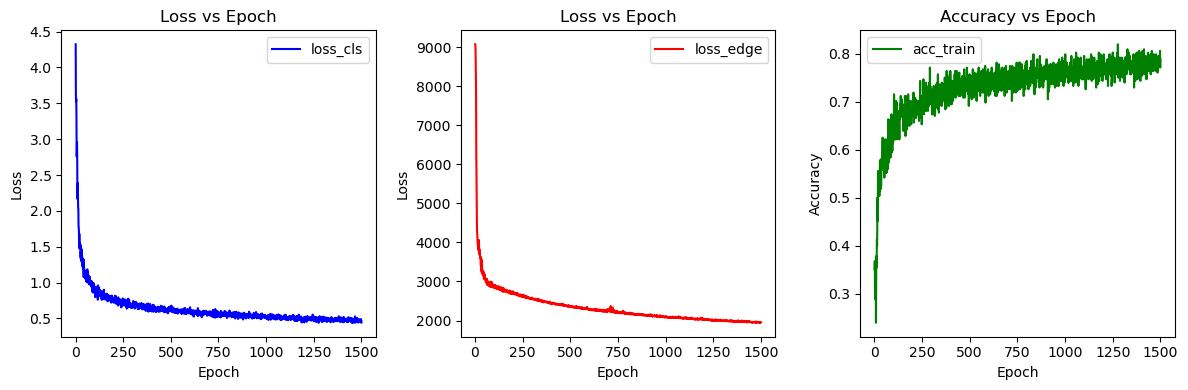

In [1]:
import matplotlib.pyplot as plt
import re

# 定义一个函数来读取日志文件并提取数据
def extract_data_from_log(file_path):
    epochs = []
    loss_cls = []
    loss_edge = []
    acc_train = []
    
    with open(file_path, 'r') as f:
        for line in f:
            # 使用正则表达式匹配符合格式的行
            match = re.match(r"Epoch: (\d+)\s+loss_cls: ([\d\.]+)\s+loss_edge: ([\d\.]+)\s+acc_train: ([\d\.]+)", line)
            if match:
                epoch = int(match.group(1))
                cls_loss = float(match.group(2))
                edge_loss = float(match.group(3))
                train_acc = float(match.group(4))
                
                epochs.append(epoch)
                loss_cls.append(cls_loss)
                loss_edge.append(edge_loss)
                acc_train.append(train_acc)
    
    return epochs, loss_cls, loss_edge, acc_train

# 提取数据
file_path = '/root/autodl-tmp/GraphSmin/output_my_data_sage_step_new_Graph.log'
epochs, loss_cls, loss_edge, acc_train = extract_data_from_log(file_path)

# 创建绘图
plt.figure(figsize=(12, 4))

# 绘制 loss_cls 和 loss_edge
plt.subplot(1, 3, 1)
plt.plot(epochs, loss_cls, label='loss_cls', color='b')
#plt.plot(epochs, loss_edge, label='loss_edge', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.subplot(1, 3, 2)
#plt.plot(epochs, loss_cls, label='loss_cls', color='b')
plt.plot(epochs, loss_edge, label='loss_edge', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

# 绘制 acc_train
plt.subplot(1, 3, 3)
plt.plot(epochs, acc_train, label='acc_train', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()
